In [1]:
import pickle
import numpy
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

In [2]:
model=pickle.load(open('model.pkl','rb'))

In [3]:
class_names = ['Anthracnose',
 'Bacterial Canker',
 'Cutting Weevil',
 'Die Back',
 'Gall Midge',
 'Healthy',
 'Powdery Mildew',
 'Sooty Mould']
class_names

['Anthracnose',
 'Bacterial Canker',
 'Cutting Weevil',
 'Die Back',
 'Gall Midge',
 'Healthy',
 'Powdery Mildew',
 'Sooty Mould']

In [4]:
def predict(model, image):
    img_array = tf.keras.preprocessing.image.img_to_array(image)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

Enter the path of the file:
./Test_Images/Sooty Mould_1.jpg
1/1 [==============================] - 0s 49ms/step


(-0.5, 255.5, 255.5, -0.5)

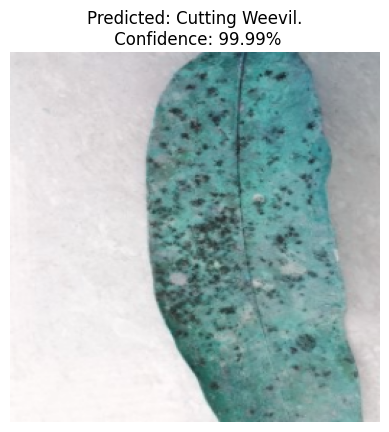

In [14]:
image = input("Enter the path of the file:\n")
image = cv2.imread(image)
image = cv2.resize(image, (256, 256))
plt.imshow(image.astype("uint8"))
predicted_class, confidence = predict(model, image)

plt.title(f"Predicted: {predicted_class}.\n Confidence: {confidence}%")
plt.axis("off")

In [ ]:
# ./Test_Images/Sooty Mould_1.jpg